<a href="https://colab.research.google.com/github/Ghaidahazaa/Investigating-Compounds-Targeting-nAChR-/blob/main/ML_for_Neuronal_acetylcholine_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#**2. Load the data set**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp '/content/drive/My Drive/Colab Notebooks/data2/Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv' '/content/drive/My Drive/Colab Notebooks/data2/Copy_of_Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data2/Copy_of_Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

#**3. Data pre-processing**

In [7]:
X.shape

(85, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(85, 163)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#**4. Compare ML algorithms**

In [10]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:18<00:00,  2.22it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 98
[LightGBM] [Info] Start training from score 7.470383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [11]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,11337688199761359068587715833599048287004374672...,-1041650103353074837726658443200536531430755595...,14206771687785934631306141669184138143795298146...,0.24
KernelRidge,4.45,-30.66,7.83,0.02
GaussianProcessRegressor,2.63,-13.95,5.38,0.06
PassiveAggressiveRegressor,1.54,-3.92,3.09,0.05
MLPRegressor,1.22,-1.00,1.97,0.15
ExtraTreesRegressor,1.17,-0.59,1.76,0.29
DecisionTreeRegressor,1.17,-0.55,1.73,0.05
ExtraTreeRegressor,1.17,-0.55,1.73,0.02
XGBRegressor,1.17,-0.54,1.73,1.92


In [12]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,11337688199761359068587715833599048287004374672...,-1041650103353074837726658443200536531430755595...,14206771687785934631306141669184138143795298146...,0.24
KernelRidge,4.45,-30.66,7.83,0.02
GaussianProcessRegressor,2.63,-13.95,5.38,0.06
PassiveAggressiveRegressor,1.54,-3.92,3.09,0.05
MLPRegressor,1.22,-1.00,1.97,0.15
ExtraTreesRegressor,1.17,-0.59,1.76,0.29
DecisionTreeRegressor,1.17,-0.55,1.73,0.05
ExtraTreeRegressor,1.17,-0.55,1.73,0.02
XGBRegressor,1.17,-0.54,1.73,1.92


#**5. Data visualization of model performance**

In [13]:
# Assuming 'train' and 'test' DataFrames are already defined
train.reset_index(inplace=True)
test.reset_index(inplace=True)

train.rename(columns={'index': 'Model'}, inplace=True)
test.rename(columns={'index': 'Model'}, inplace=True)

# Combine train and test metrics into a single DataFrame for easier plotting
train_metrics = train[['Model', 'R-Squared', 'RMSE', 'Time Taken']]
test_metrics = test[['Model', 'R-Squared', 'RMSE', 'Time Taken']]

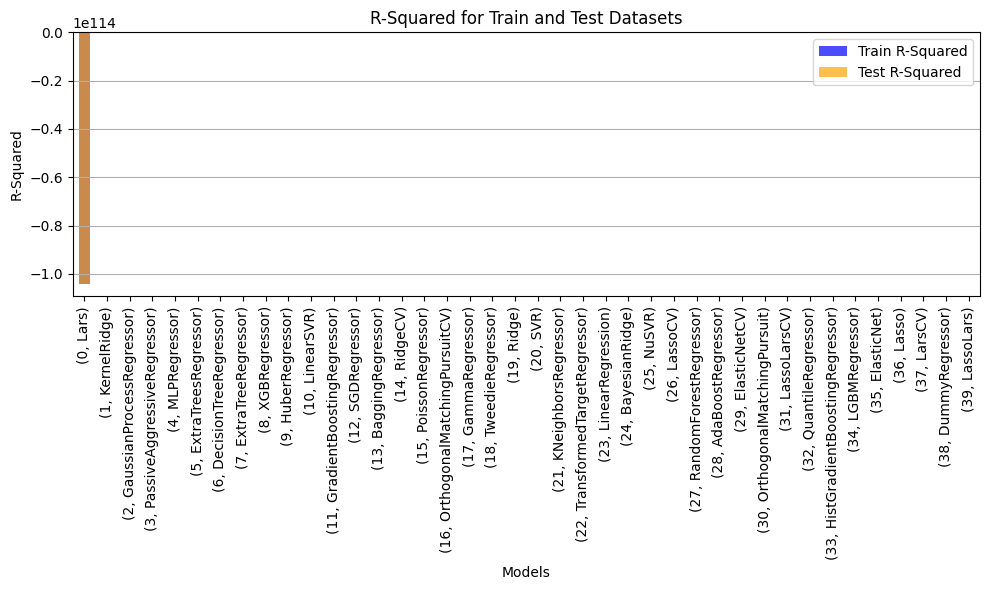

In [14]:
import matplotlib.pyplot as plt

# Plot R-Squared
plt.figure(figsize=(10, 6))
train_metrics.set_index('Model')['R-Squared'].plot(kind='bar', color='blue', alpha=0.7, label='Train R-Squared')
test_metrics.set_index('Model')['R-Squared'].plot(kind='bar', color='orange', alpha=0.7, label='Test R-Squared')
plt.title('R-Squared for Train and Test Datasets')
plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

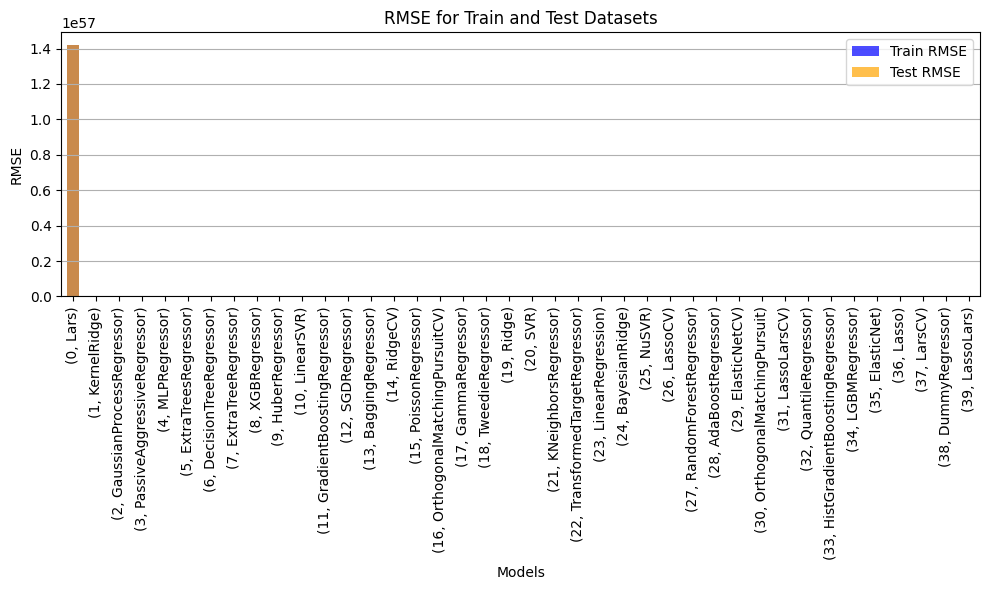

In [15]:
import matplotlib.pyplot as plt

# Plot RMSE
plt.figure(figsize=(10, 6))
train_metrics.set_index('Model')['RMSE'].plot(kind='bar', color='blue', alpha=0.7, label='Train RMSE')
test_metrics.set_index('Model')['RMSE'].plot(kind='bar', color='orange', alpha=0.7, label='Test RMSE')
plt.title('RMSE for Train and Test Datasets')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

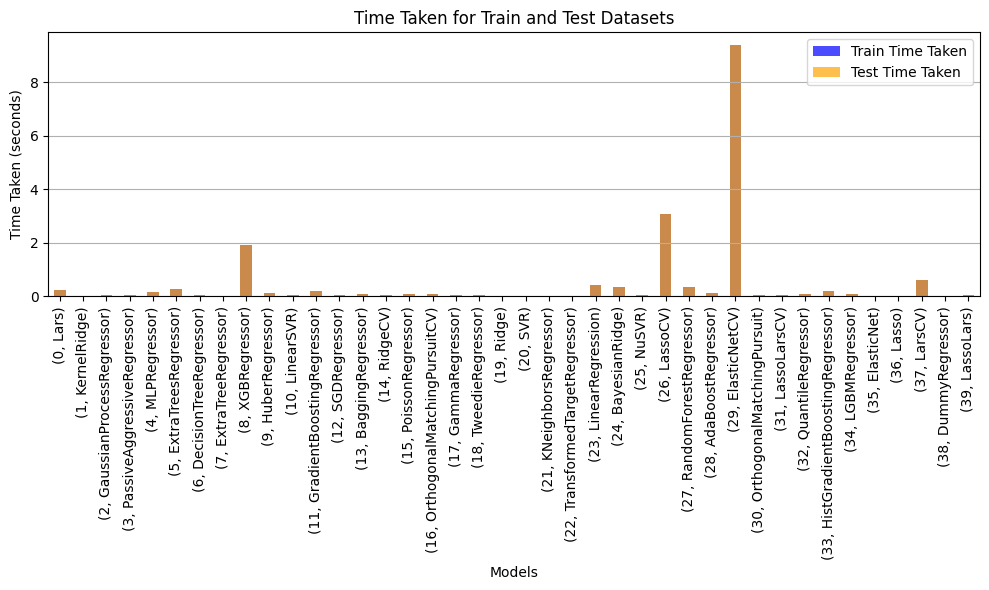

In [16]:
import matplotlib.pyplot as plt

# Plot Time Taken
plt.figure(figsize=(10, 6))
train_metrics.set_index('Model')['Time Taken'].plot(kind='bar', color='blue', alpha=0.7, label='Train Time Taken')
test_metrics.set_index('Model')['Time Taken'].plot(kind='bar', color='orange', alpha=0.7, label='Test Time Taken')
plt.title('Time Taken for Train and Test Datasets')
plt.xlabel('Models')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()